# Ngô Quang Vũ
# 197CT10170

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


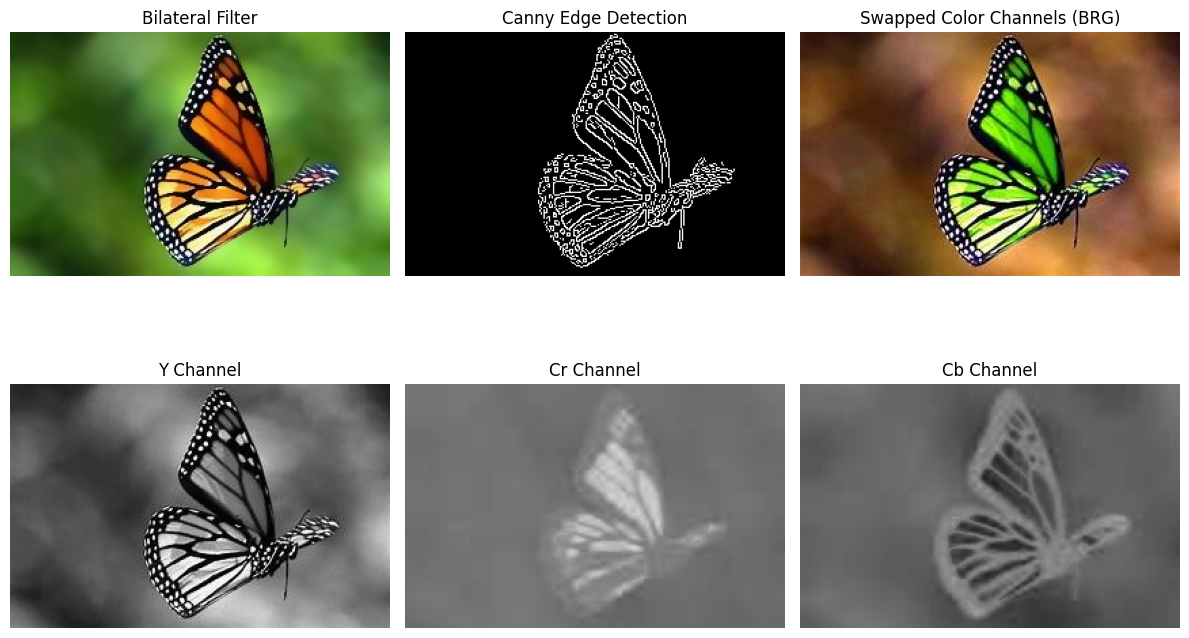

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


image_name = "image1.jpg"  # thay bằng tên ảnh thật của bạn
img = cv2.imread(image_name)

output_dir = "output_cau1"
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# 1. Bilateral Filter 
bilateral_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imwrite(f"{output_dir}/image1_bilateral.jpg", bilateral_filtered)

# -----------------------------
# 2. Canny Edge Detection 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
cv2.imwrite(f"{output_dir}/image1_canny.jpg", edges)

# -----------------------------
# 3. Hoán đổi kênh màu: BGR -> BRG 
swapped_img = img[:, :, [0, 2, 1]] 
cv2.imwrite(f"{output_dir}/image1_swapped.jpg", swapped_img)

# -----------------------------
# 4. Chuyển sang YCrCb và tách kênh 
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb)

cv2.imwrite(f"{output_dir}/image1_Y.jpg", Y)
cv2.imwrite(f"{output_dir}/image1_Cr.jpg", Cr)
cv2.imwrite(f"{output_dir}/image1_Cb.jpg", Cb)

# -----------------------------
# Hiển thị kết quả (tùy chọn)
image_paths = [
    f"{output_dir}/image1_bilateral.jpg",
    f"{output_dir}/image1_canny.jpg",
    f"{output_dir}/image1_swapped.jpg",
    f"{output_dir}/image1_Y.jpg",
    f"{output_dir}/image1_Cr.jpg",
    f"{output_dir}/image1_Cb.jpg"
]

titles = [
    "Bilateral Filter",
    "Canny Edge Detection",
    "Swapped Color Channels (BRG)",
    "Y Channel",
    "Cr Channel",
    "Cb Channel"
]

plt.figure(figsize=(12, 8))

for i, path in enumerate(image_paths):
    img_show = cv2.imread(path)

    if len(img_show.shape) == 2:
        img_rgb = img_show
        cmap = 'gray'
    else:
        img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        cmap = None

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_rgb, cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


In [17]:
import cv2
import numpy as np
import random
import os

img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')

if img1 is None or img2 is None or img3 is None:
    print("Lỗi: Không thể đọc một trong các ảnh. Vui lòng kiểm tra đường dẫn.")
    exit()

output_dir = "output_cau2"
os.makedirs(output_dir, exist_ok=True)

# ------- Các hàm xử lý ảnh -----

def zoom_image(img):
    scale = random.uniform(1.2, 2.0)
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w * scale), int(h * scale)))

def rotate_image(img):
    angle = random.randint(0, 360)
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h))

def flip_horizontal(img):
    return cv2.flip(img, 1)

def flip_vertical(img):
    return cv2.flip(img, 0)

def crop_center(img):
    h, w = img.shape[:2]
    ch, cw = h // 2, w // 2
    sy, sx = h // 4, w // 4
    return img[sy:sy+ch, sx:sx+cw]

def add_padding(img):
    top, bottom = random.randint(10, 50), random.randint(10, 50)
    left, right = random.randint(10, 50), random.randint(10, 50)
    color = [random.randint(0, 255) for _ in range(3)]
    return cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

# ----Hàm xử lý và lưu ảnh----
def apply_transformation(transformation_fn, method_name):
    for i, (img, path) in enumerate(zip(images, image_paths)):
        result = transformation_fn(img)
        filename = os.path.splitext(os.path.basename(path))[0]
        save_path = os.path.join(output_dir, f"result_{method_name}_{filename}.jpg")
        cv2.imwrite(save_path, result)
        print(f"✔ Đã lưu: {save_path}")

# ---- Menu tương tác -----
def show_menu():
    print("\n===== MENU XỬ LÝ ẢNH =====")
    print("Z - Zoom (Phóng to)")
    print("T - Rotate (Xoay ảnh)")
    print("H - Horizontal Flip (Lật ngang)")
    print("V - Vertical Flip (Lật dọc)")
    print("C - Crop (Cắt ảnh vùng giữa)")
    print("P - Padding (Thêm viền màu ngẫu nhiên)")
    print("Q - Thoát chương trình")

    while True:
        key = input("Nhập lựa chọn của bạn (Z/T/H/V/C/P/Q): ").strip().upper()
        if key == 'Z':
            apply_transformation(zoom_image, "zoom")
        elif key == 'T':
            apply_transformation(rotate_image, "rotate")
        elif key == 'H':
            apply_transformation(flip_horizontal, "hflip")
        elif key == 'V':
            apply_transformation(flip_vertical, "vflip")
        elif key == 'C':
            apply_transformation(crop_center, "crop")
        elif key == 'P':
            apply_transformation(add_padding, "padding")
        elif key == 'Q':
            print(" Kết thúc chương trình.")
            break
        else:
            print(" Phím không hợp lệ. Vui lòng nhập lại!")


show_menu()



===== MENU XỬ LÝ ẢNH =====
Z - Zoom (Phóng to)
T - Rotate (Xoay ảnh)
H - Horizontal Flip (Lật ngang)
V - Vertical Flip (Lật dọc)
C - Crop (Cắt ảnh vùng giữa)
P - Padding (Thêm viền màu ngẫu nhiên)
Q - Thoát chương trình
✔ Đã lưu: output_cau2\result_hflip_image1.jpg
✔ Đã lưu: output_cau2\result_hflip_image2.jpg
✔ Đã lưu: output_cau2\result_hflip_image3.jpg
✔ Đã lưu: output_cau2\result_vflip_image1.jpg
✔ Đã lưu: output_cau2\result_vflip_image2.jpg
✔ Đã lưu: output_cau2\result_vflip_image3.jpg
✔ Đã lưu: output_cau2\result_crop_image1.jpg
✔ Đã lưu: output_cau2\result_crop_image2.jpg
✔ Đã lưu: output_cau2\result_crop_image3.jpg
✔ Đã lưu: output_cau2\result_padding_image1.jpg
✔ Đã lưu: output_cau2\result_padding_image2.jpg
✔ Đã lưu: output_cau2\result_padding_image3.jpg
 Kết thúc chương trình.


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


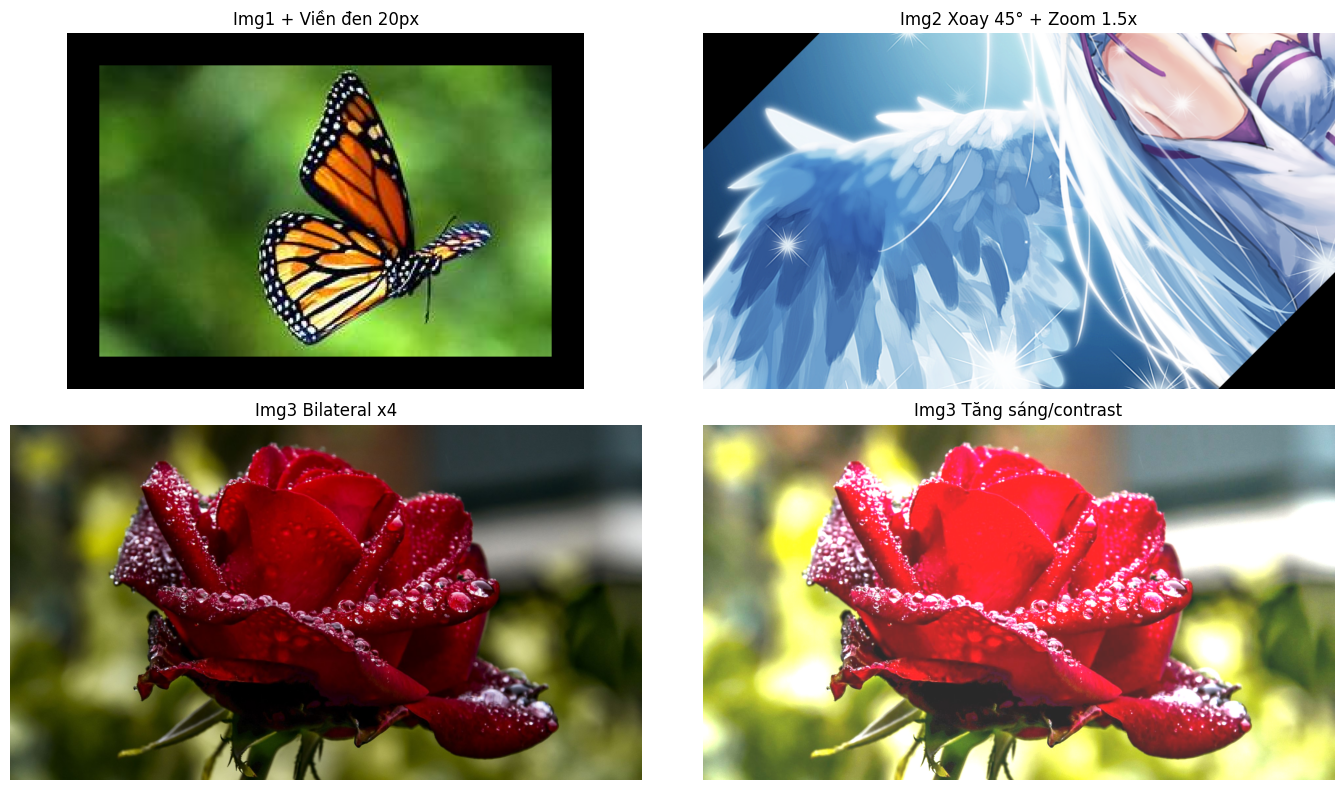

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. Đọc ảnh
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')


if img1 is None or img2 is None or img3 is None:
    print("Lỗi: Không thể đọc một trong các ảnh. Vui lòng kiểm tra đường dẫn.")
    exit()

output_folder = 'output_cau3'
os.makedirs(output_folder, exist_ok=True)

# 1. Thêm viền đen 20 pixel cho ảnh đầu tiên
if img1 is not None:
    img1_border = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    cv2.imwrite(f'{output_folder}/img1_border.jpg', img1_border)
else:
    img1_border = np.zeros((100, 100, 3), dtype=np.uint8)

# -----------------------------
# 2. Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần
if img2 is not None:
    height2, width2 = img2.shape[:2]
    center = (width2 // 2, height2 // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.5) 
    rotated_zoomed_img2 = cv2.warpAffine(img2, rotation_matrix, (width2, height2))
    cv2.imwrite(f'{output_folder}/img2_rotated_zoomed.jpg', rotated_zoomed_img2)
else:
    rotated_zoomed_img2 = np.zeros((100, 100, 3), dtype=np.uint8)

# -----------------------------
# 3. Ảnh thứ ba: resize x4, Bilateral, biến đổi sáng/tương phản
if img3 is not None:
    height3, width3 = img3.shape[:2]
    resized_img3 = cv2.resize(img3, (width3 * 4, height3 * 4), interpolation=cv2.INTER_LINEAR)
    
    # Bilateral Filter
    bilateral_img3 = cv2.bilateralFilter(resized_img3, d=9, sigmaColor=75, sigmaSpace=75)
    cv2.imwrite(f'{output_folder}/img3_bilateral.jpg', bilateral_img3)

    # Biến đổi tuyến tính 
    alpha = 1.8  # trong khoảng [0.6,2.0]
    beta = 40    # trong khoảng [-60, 60]
    linear_transformed_img3 = np.clip(alpha * bilateral_img3 + beta, 0, 255).astype(np.uint8)
    cv2.imwrite(f'{output_folder}/img3_transformed.jpg', linear_transformed_img3)
else:
    bilateral_img3 = np.zeros((100, 100, 3), dtype=np.uint8)
    linear_transformed_img3 = np.zeros((100, 100, 3), dtype=np.uint8)

# -----------------------------
# Hiển thị ảnh dùng matplotlib
images = [img1_border, rotated_zoomed_img2, bilateral_img3, linear_transformed_img3]
titles = ['Img1 + Viền đen 20px', 'Img2 Xoay 45° + Zoom 1.5x', 'Img3 Bilateral x4', 'Img3 Tăng sáng/contrast']

plt.figure(figsize=(14, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()    

# Chúc các bạn thi may mắn và đạt điểm 10.